# Problem Statement
* The objective of this project is to utilize machine learning techniques to create an accurate predictive model for forecasting sales of products in the Big Mart retail chain. 
* This problem is a Regression Machine Learning task, where the goal is to predict continuous numerical values. 
* Specifically, we aim to predict the sales of various products across different stores based on historical sales data and other relevant features. 
* The developed model will help Big Mart optimize inventory management, stock replenishment strategies and store performance by providing reliable sales forecasts.



In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
big_mart_sales_df = pd.read_csv('/kaggle/input/big-mart-sales-predict/Train.csv') 
big_mart_sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
print('The size of Dataframe is: ', big_mart_sales_df.shape)
print('The Column Name, Record Count and Data Types are as follows: ')
big_mart_sales_df.info()


The size of Dataframe is:  (8523, 12)
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: f

In [4]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in big_mart_sales_df.columns if big_mart_sales_df[feature].dtype != 'O']
categorical_features = [feature for feature in big_mart_sales_df.columns if big_mart_sales_df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 5 numerical features : ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

We have 7 categorical features : ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [5]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
total=big_mart_sales_df.isnull().sum().sort_values(ascending=False)
percent=(big_mart_sales_df.isnull().sum()/big_mart_sales_df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


Missing Value Presence in different columns of DataFrame are as follows : 


,Total,Percent
Outlet_Size,2410,28.276428
Item_Weight,1463,17.165317
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Location_Type,0,0.000000


In [6]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
big_mart_sales_df.describe()


Summary Statistics of numerical features for DataFrame are as follows:


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
print('Summary Statistics of categorical features for DataFrame are as follows:')
big_mart_sales_df.describe(include='object').T


Summary Statistics of categorical features for DataFrame are as follows:


,count,unique,top,freq
Item_Identifier,8523,1559,FDW13,10
Item_Fat_Content,8523,5,Low Fat,5089
Item_Type,8523,16,Fruits and Vegetables,1232
Outlet_Identifier,8523,10,OUT027,935
Outlet_Size,6113,3,Medium,2793
Outlet_Location_Type,8523,3,Tier 3,3350
Outlet_Type,8523,4,Supermarket Type1,5577


In [8]:
#Data Cleaning and Preprocessing
big_mart_sales_df['Item_Weight'].fillna(big_mart_sales_df['Item_Weight'].mean(), inplace=True)


In [9]:
#Filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = big_mart_sales_df['Outlet_Size'].mode()[0]
mode_of_Outlet_size

'Medium'

In [10]:
big_mart_sales_df['Outlet_Size'].fillna(mode_of_Outlet_size, inplace=True)

In [11]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
total=big_mart_sales_df.isnull().sum().sort_values(ascending=False)
percent=(big_mart_sales_df.isnull().sum()/big_mart_sales_df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 


,Total,Percent
Item_Identifier,0,0.0
Item_Weight,0,0.0
Item_Fat_Content,0,0.0
Item_Visibility,0,0.0
Item_Type,0,0.0
Item_MRP,0,0.0
Outlet_Identifier,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Size,0,0.0
Outlet_Location_Type,0,0.0


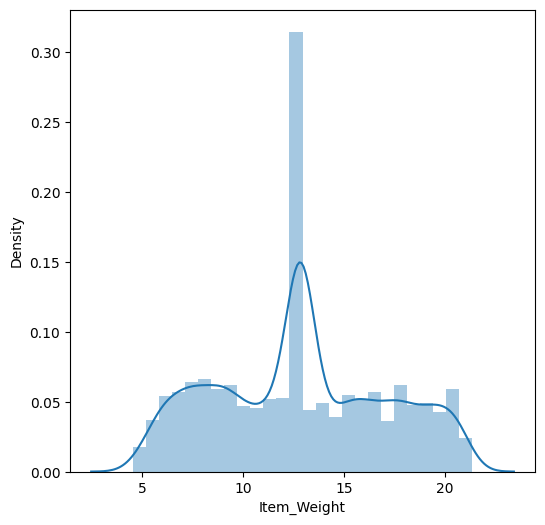

In [12]:
#Item Weight Distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_sales_df['Item_Weight'])
plt.show()


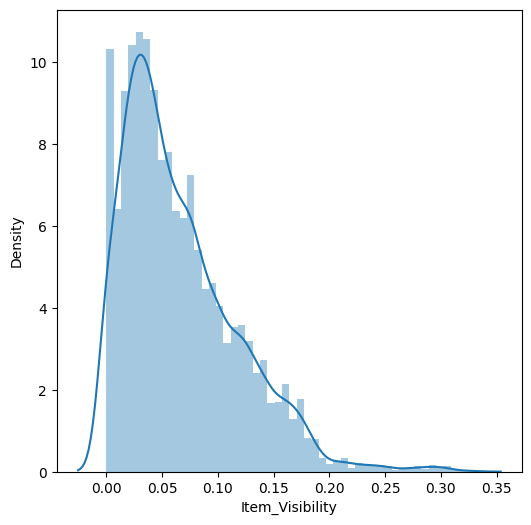

In [13]:
#Item Visibility Distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_sales_df['Item_Visibility'])
plt.show()

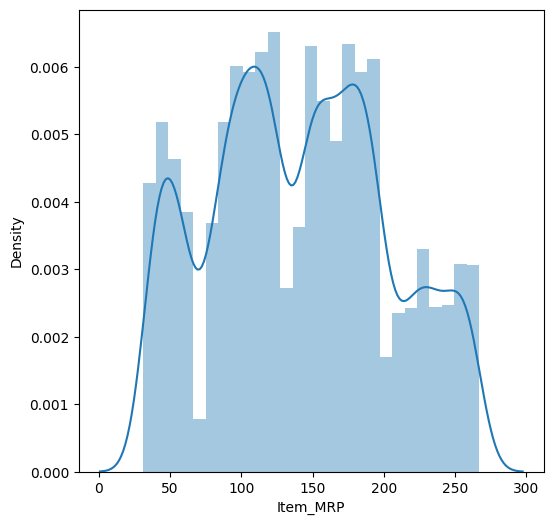

In [14]:
#Item MRP Distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_sales_df['Item_MRP'])
plt.show()


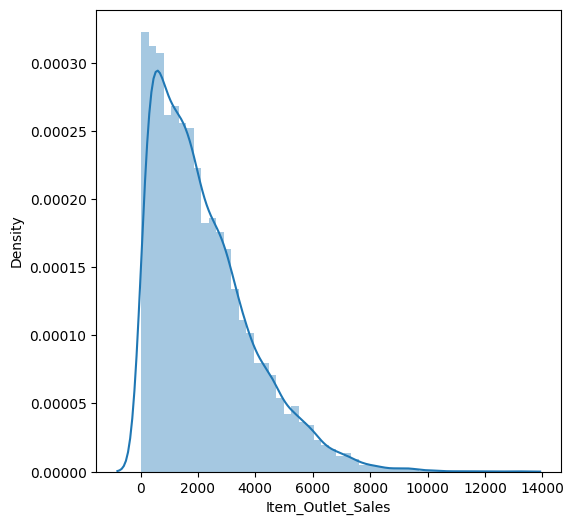

In [15]:
#Item Outlet Sales Distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_sales_df['Item_Outlet_Sales'])
plt.show()


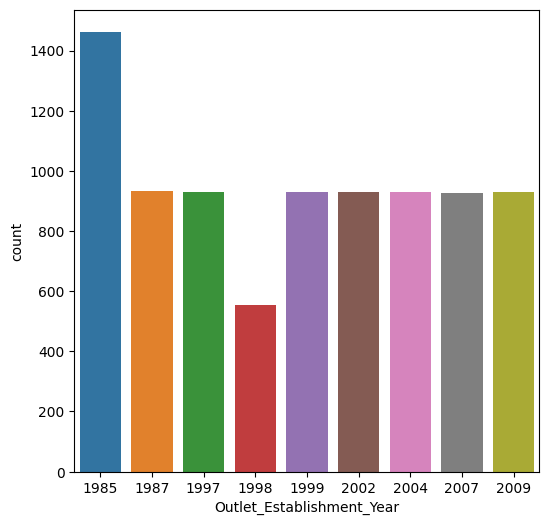

In [16]:
#Outlet Establishment Year
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_sales_df)
plt.show()

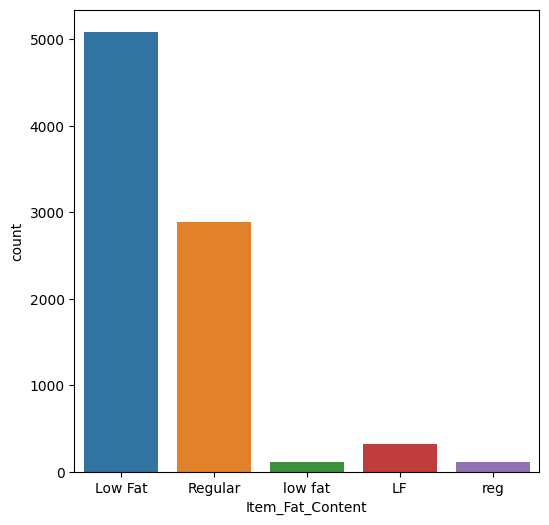

In [17]:
#Item Fat Content Distribution
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_sales_df)
plt.show()


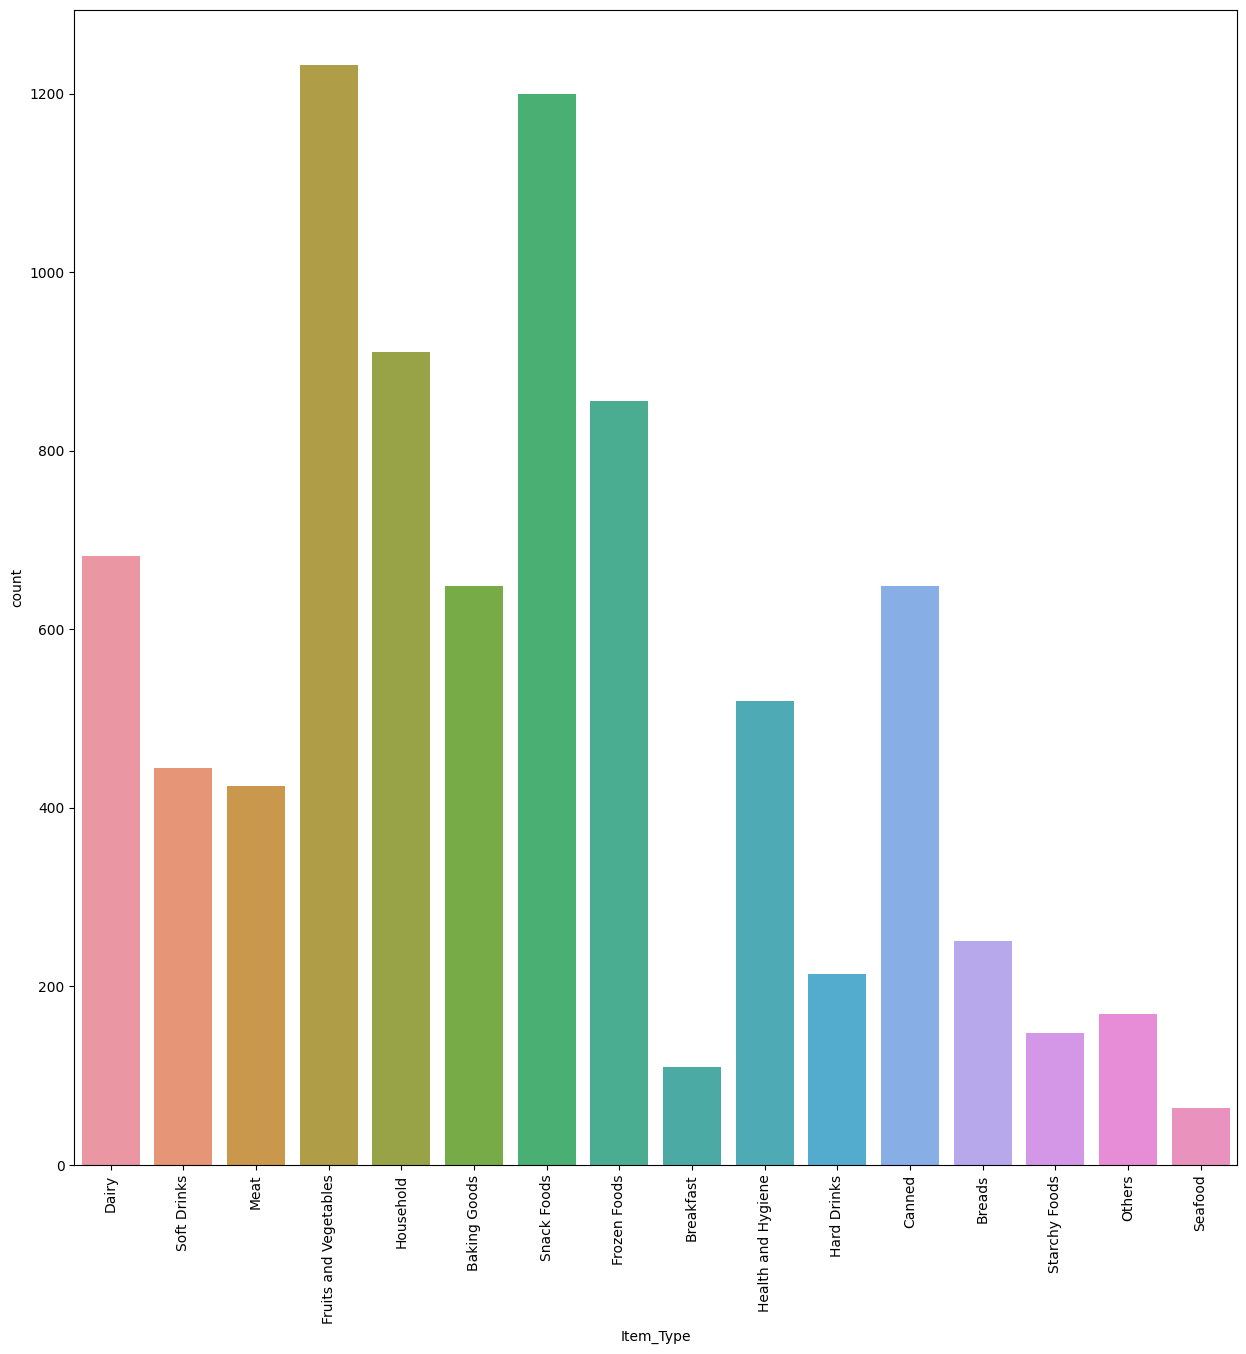

In [18]:
#Item Type Distribution
plt.figure(figsize=(15,15))
sns.countplot(x='Item_Type', data=big_mart_sales_df)
plt.xticks(rotation=90)
plt.show()


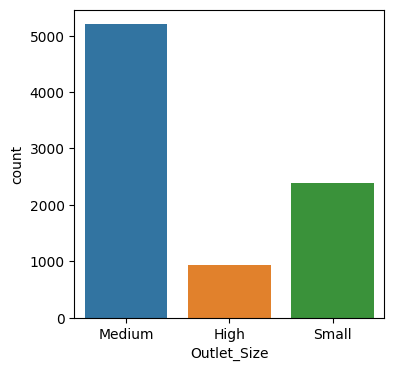

In [19]:
#Outlet Size Distribution
plt.figure(figsize=(4,4))
sns.countplot(x='Outlet_Size', data=big_mart_sales_df)
plt.show()

In [20]:
big_mart_sales_df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [21]:
big_mart_sales_df['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [22]:
big_mart_sales_df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
big_mart_sales_df['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
big_mart_sales_df['Item_Identifier'] = encoder.fit_transform(big_mart_sales_df['Item_Identifier'])

big_mart_sales_df['Item_Fat_Content'] = encoder.fit_transform(big_mart_sales_df['Item_Fat_Content'])

big_mart_sales_df['Item_Type'] = encoder.fit_transform(big_mart_sales_df['Item_Type'])

big_mart_sales_df['Outlet_Identifier'] = encoder.fit_transform(big_mart_sales_df['Outlet_Identifier'])

big_mart_sales_df['Outlet_Size'] = encoder.fit_transform(big_mart_sales_df['Outlet_Size'])

big_mart_sales_df['Outlet_Location_Type'] = encoder.fit_transform(big_mart_sales_df['Outlet_Location_Type'])

big_mart_sales_df['Outlet_Type'] = encoder.fit_transform(big_mart_sales_df['Outlet_Type'])
big_mart_sales_df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [24]:
# separating the data and labels
X = big_mart_sales_df.drop(columns = ['Item_Outlet_Sales'], axis=1) # Feature matrix
y = big_mart_sales_df['Item_Outlet_Sales'] # Target variable

In [25]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [26]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)


StandardScaler()

In [28]:
standardized_data = scaler.transform(X)
standardized_data

array([[-1.38851383, -0.84187169, -0.73814723, ..., -0.28458121,
        -1.36933384, -0.25265831],
       [-1.71799137, -1.64170589,  1.35474328, ..., -0.28458121,
         1.09156913,  1.00297245],
       [-0.26205684,  1.09855449, -0.73814723, ..., -0.28458121,
        -1.36933384, -0.25265831],
       ...,
       [ 1.28515188, -0.53424315, -0.73814723, ...,  1.38127431,
        -0.13888236, -0.25265831],
       [-0.21975905, -1.33644372,  1.35474328, ..., -0.28458121,
         1.09156913,  1.00297245],
       [-1.62449099,  0.45963367, -0.73814723, ...,  1.38127431,
        -1.36933384, -0.25265831]])

In [29]:
X = standardized_data

In [30]:
X

array([[-1.38851383, -0.84187169, -0.73814723, ..., -0.28458121,
        -1.36933384, -0.25265831],
       [-1.71799137, -1.64170589,  1.35474328, ..., -0.28458121,
         1.09156913,  1.00297245],
       [-0.26205684,  1.09855449, -0.73814723, ..., -0.28458121,
        -1.36933384, -0.25265831],
       ...,
       [ 1.28515188, -0.53424315, -0.73814723, ...,  1.38127431,
        -0.13888236, -0.25265831],
       [-0.21975905, -1.33644372,  1.35474328, ..., -0.28458121,
         1.09156913,  1.00297245],
       [-1.62449099,  0.45963367, -0.73814723, ...,  1.38127431,
        -1.36933384, -0.25265831]])

In [31]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


In [32]:
print(X.shape, X_train.shape, X_test.shape)


(8523, 11) (6818, 11) (1705, 11)


In [33]:
print(y.shape, y_train.shape, y_test.shape)

(8523,) (6818,) (1705,)


In [34]:
# For Model Building
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
models = [LinearRegression, Lasso, Ridge, SVR, DecisionTreeRegressor, RandomForestRegressor]
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for model in models:
    regressor = model().fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))
    r2_scores.append(r2_score(y_test, y_pred))
regression_metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso", "Ridge", "SVR", "Decision Tree Regressor", "Random Forest Regressor"],
    "Mean Absolute Error": mae_scores,
    "Mean Squared Error": mse_scores,
    "Root Mean Squared Error": rmse_scores,
    "R-squared (R2)": r2_scores
})

regression_metrics_df.set_index('Model', inplace=True)
regression_metrics_df


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared (R2)
Model,,,,
Linear Regression,914.031449,1.467286e+06,1211.315750,0.513540
Lasso,913.798607,1.467179e+06,1211.271612,0.513575
Ridge,914.018520,1.467280e+06,1211.313347,0.513542
SVR,1275.296435,2.924914e+06,1710.238028,0.030281
Decision Tree Regressor,1080.245466,2.385080e+06,1544.370507,0.209256
Random Forest Regressor,805.314294,1.344645e+06,1159.588123,0.554200


# Inference
In the context of predicting Big Mart sales ;

* The results reveal that the Random Forest Regressor outperforms its counterparts, demonstrating the lowest Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). 
* Its substantial R-squared (R2) value of 0.557 indicates that this model successfully captures a significant portion of the variance in sales data, making it the top choice for sales prediction.
* Conversely, linear regression-based models (Linear Regression, Lasso, Ridge) show reasonably good but slightly inferior performance with R2 values around 0.514.
* However, the Support Vector Regressor (SVR) and Decision Tree Regressor lag behind, struggling to provide accurate sales forecasts. The Random Forest Regressor* stands out as the most promising candidate for optimizing inventory management and sales forecasting in Big Mart stores.